<a href="https://colab.research.google.com/github/apekshamehta/machine-learning-examples/blob/main/random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score


In [ ]:
warnings.filterwarnings('ignore')

In [ ]:
df= pd.read_csv('Position_Salaries.csv')
print(df)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [ ]:
X = df.iloc[:,1:2].values
y = df.iloc[:,2].values
print(X)
print(y)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [ ]:
label_encoder = LabelEncoder()
x_categorical = df.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
print(df.select_dtypes(include=['object']))
x_numerical = df.select_dtypes(exclude=['object']).values
print(df.select_dtypes(exclude=['object']))
x = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values

regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

regressor.fit(x, y)

            Position
0   Business Analyst
1  Junior Consultant
2  Senior Consultant
3            Manager
4    Country Manager
5     Region Manager
6            Partner
7     Senior Partner
8            C-level
9                CEO
   Level   Salary
0      1    45000
1      2    50000
2      3    60000
3      4    80000
4      5   110000
5      6   150000
6      7   200000
7      8   300000
8      9   500000
9     10  1000000


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

1
10
[[1.   0.   0.  ]
 [1.01 0.   0.  ]
 [1.02 0.   0.  ]
 ...
 [9.97 0.   0.  ]
 [9.98 0.   0.  ]
 [9.99 0.   0.  ]]


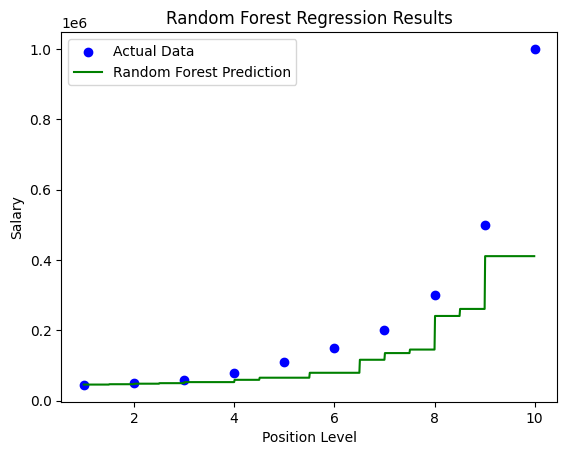

In [ ]:
import numpy as np

X_grid = np.arange(min(X[:, 0]), max(X[:, 0]), 0.01)  # Only the first feature
print(min(X[:, 0]))
print(max(X[:, 0]))
X_grid = X_grid.reshape(-1, 1)

X_grid = np.hstack((X_grid, np.zeros((X_grid.shape[0], 2))))  # Pad with zeros


plt.scatter(X[:, 0], y, color='blue', label="Actual Data")
plt.plot(X_grid[:, 0], regressor.predict(X_grid), color='green', label="Random Forest Prediction")
plt.title("Random Forest Regression Results")
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.legend()
plt.show()